In [1]:
import numpy as np #array operations

In [2]:
import matplotlib.pyplot as plt #show images
import os #iterate through directories
import cv2 # image operations (pip install opencv-python)

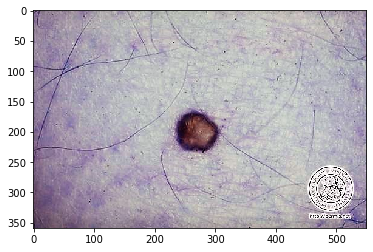

In [11]:
# specify data directory
DATADIR = r"C:\Users\sulei\Documents\Melanoma\IMAGES" 
# two categories we have of images
CATEGORIES = ["Neg", "Pos"]

#iterate through all examples of images
for category in CATEGORIES:
    #path to negs or pos dir
    path = os.path.join(DATADIR, category) 
    #images named by number
    for img in os.listdir(path):
        #convert to array, read image in color
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        #check our images are loaded
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [12]:
#check shape and number of channels
print(img_array.shape)

(359, 550, 3)


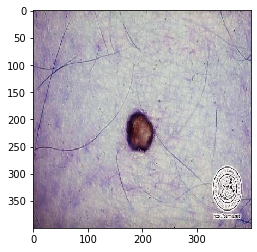

In [13]:
#set a size for all images
IMG_SIZE = 400 #Test sizes 50x50, 100x100, 150x150

#check resized images covers good portion of image
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [14]:
#create training data list
training_data = []

def create_training_data():
    for category in CATEGORIES:
        #path to negs or pos dir
        path = os.path.join(DATADIR, category) 
        #map string data to a numeric value 0-negatives and 1-positives using index values
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #iterate through the images
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #append to training data list above
                training_data.append([new_array, class_num])
                #if there are an exceptions pass 
            except Exception as e:
                pass

#create the training data
create_training_data() 

In [15]:
#length of training data
print(len(training_data))

200


In [16]:
#data needs to be shuffled so perdiction is not based on how categories are loaded
import random
random.shuffle(training_data)

In [17]:
#check first 10 samples are in random order
for sample in training_data[:10]:
    print (sample[1])

1
1
0
1
0
1
0
1
1
1


In [18]:
#pack in to the variables we need for training X-features set y-labels
X = []
y = []

In [19]:
for features, label in training_data:
    #appened X and y
    X.append(features)
    y.append(label)
    
    #X needs to passed as numpy array and not list, y can remain list (labels)
    #shape by -1(any data), image size and number of image channels
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [20]:
#save data of X and y using pickle
import pickle

pickle_out = open("X2_MEL.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y2_MEL.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [21]:
#loading data
pickle_in = open("X2_MEL.pickle", "rb")
X = pickle.load(pickle_in)

In [22]:
#check data
X[1]

array([[[158, 171, 214],
        [159, 174, 215],
        [160, 174, 216],
        ...,
        [191, 203, 237],
        [195, 207, 241],
        [198, 210, 244]],

       [[138, 152, 194],
        [140, 154, 196],
        [141, 155, 197],
        ...,
        [190, 202, 236],
        [193, 205, 239],
        [196, 208, 242]],

       [[137, 151, 193],
        [138, 152, 194],
        [139, 153, 195],
        ...,
        [191, 203, 237],
        [194, 206, 239],
        [196, 208, 242]],

       ...,

       [[174, 187, 225],
        [172, 185, 223],
        [172, 185, 223],
        ...,
        [177, 190, 228],
        [181, 195, 232],
        [186, 199, 237]],

       [[178, 191, 229],
        [175, 188, 226],
        [174, 187, 225],
        ...,
        [179, 193, 231],
        [184, 197, 235],
        [188, 201, 239]],

       [[181, 194, 232],
        [178, 191, 229],
        [176, 189, 227],
        ...,
        [183, 197, 234],
        [187, 200, 238],
        [190, 203, 240]]